In [4]:
!pip install pgmpy

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pgmpy.models.DiscreteBayesianNetwork import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination


In [20]:
rawDS = pd.read_csv('/content/heart_disease.csv')
rawDS.shape


(303, 14)

In [21]:
rawDS = rawDS.drop_duplicates()
rawDS.shape

(302, 14)

In [22]:
rawDS = rawDS.dropna()
rawDS.shape

(302, 14)

In [23]:
rawDS.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
rawDS.to_csv('Cleaned Dataset', index=False)

In [25]:
rawDS.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [28]:
scaler = MinMaxScaler()
numeric_cols = rawDS.select_dtypes(include=['float64', 'int64']).columns.tolist()
rawDS[numeric_cols] = scaler.fit_transform(rawDS[numeric_cols])
rawDS[numeric_cols].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [33]:
model = DiscreteBayesianNetwork([
    ('age', 'fbs'),
    ('fbs', 'target'),
    ('target', 'chol'),
    ('target', 'thalach')
])

model.fit(rawDS, estimator=MaximumLikelihoodEstimator)


In [35]:
display = VariableElimination(model)

In [54]:
#1 Probability of heart disease for a patient of normalized age 0.6
q1 = display.query(variables=['target'], evidence={'age': 0.6041666666666666})
print(q1.values[1])

0.5407377067831707


### This suggests, risk of heart disease increases with age

In [38]:
print(rawDS['age'].unique())


[0.70833333 0.16666667 0.25       0.5625     0.58333333 0.3125
 0.47916667 0.52083333 0.39583333 0.41666667 0.72916667 0.60416667
 0.4375     0.77083333 0.29166667 0.83333333 0.625      0.27083333
 0.66666667 0.22916667 0.875      0.45833333 0.75       0.5
 0.35416667 0.33333333 0.20833333 0.375      0.6875     0.10416667
 0.125      0.         0.54166667 0.64583333 0.79166667 0.8125
 0.9375     0.97916667 0.85416667 0.1875     1.        ]


In [52]:
#2 Cholestrol distribution for patients with fbs=1 and target=1
q2 =display.query(variables=['chol'], evidence = {'fbs': 1, 'target': 1})
print(q2)

+----------------------------+-------------+
| chol                       |   phi(chol) |
+============================+=============+
| chol(0.0)                  |      0.0061 |
+----------------------------+-------------+
| chol(0.011415525114155278) |      0.0000 |
+----------------------------+-------------+
| chol(0.034246575342465724) |      0.0061 |
+----------------------------+-------------+
| chol(0.052511415525114125) |      0.0061 |
+----------------------------+-------------+
| chol(0.07077625570776253)  |      0.0061 |
+----------------------------+-------------+
| chol(0.0776255707762557)   |      0.0061 |
+----------------------------+-------------+
| chol(0.0867579908675799)   |      0.0000 |
+----------------------------+-------------+
| chol(0.091324200913242)    |      0.0000 |
+----------------------------+-------------+
| chol(0.09360730593607308)  |      0.0000 |
+----------------------------+-------------+
| chol(0.0958904109589041)   |      0.0061 |
+---------

In [55]:
print(q2.values.max())

0.024390243902439025


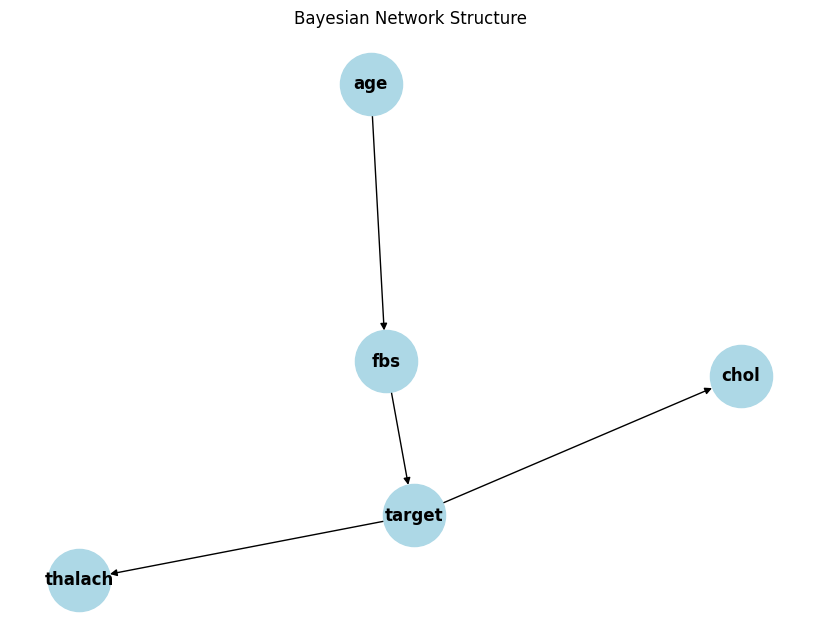

In [61]:
import matplotlib.pyplot as plt
import networkx as nx


G = nx.DiGraph()
G.add_edges_from(model.edges())

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=12, font_weight='bold', arrows=True)

plt.title("Bayesian Network Structure")
plt.show()
